# 標準ブラウン運動・ウィーナー過程
標準ブラウン運動<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
  <mo stretchy="false">(</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
</math>はウィーナー過程と呼ばれることもある。標準ブラウン運動は下記のように表現できる。

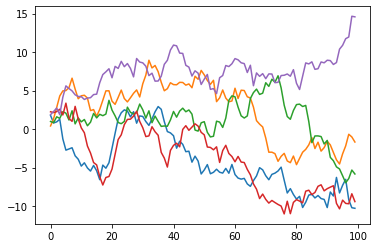

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

# 正規分布に従うランダムデータはrvsを使って取得する。複数データを取得したいときはパラメータsizeを指定する。
y[0,:] = stats.norm.rvs(size=5) #初期値の設定
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(size=5) 

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.show()

# ブラウン運動
## 確率過程の生成
下記を実行することでブラウン運動<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x3BC;</mi>
  <mi>t</mi>
  <mo>,</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
</math>を生成することができる。

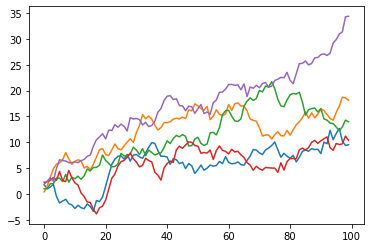

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

mu, sigma = 0.2, 1
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(mu,sigma,size=5)

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

mu, sigma = 0.2, 1
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(mu,sigma,size=5)

diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

mu_estimate = np.mean(diff, axis=0)
sigma2_estimate = np.mean(diff**2, axis=0) - mu_estimate**2

print("Estimated mu: {}".format(mu_estimate))
print("Estimated sigma^2: {}".format(sigma2_estimate))

Estimated mu: [0.09504339 0.1811264  0.13958733 0.10372601 0.34374467]
Estimated sigma^2: [1.01006428 0.91386789 0.99829055 1.06096954 0.92964815]


サンプル数を<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>n</mi>
  <mo>=</mo>
  <mn>100</mn>
から
  <mi>n</mi>
  <mo>=</mo>
  <mn>10</mn>
  <mo>,</mo>
  <mn>000</mn>
</math>に増やし、推定値の変化を確認する。

In [12]:
np.random.seed(0)

mu, sigma = 0.2, 1
x = np.arange(0,10000,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(mu,sigma,size=5)

diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

mu_estimate = np.mean(diff, axis=0)
sigma2_estimate = np.mean(diff**2, axis=0) - mu_estimate**2

print("Estimated mu: {}".format(mu_estimate))
print("Estimated sigma^2: {}".format(sigma2_estimate))

Estimated mu: [0.1966156  0.2103942  0.18599239 0.1893911  0.19853666]
Estimated sigma^2: [1.00373888 1.00122736 0.99122914 0.99615878 0.97360955]


# ポアソン過程
## ポアソン過程の生成
下記を実行することでポアソン過程<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>P</mi>
  <mi>o</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x3BB;</mi>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
</math>を生成することができる。

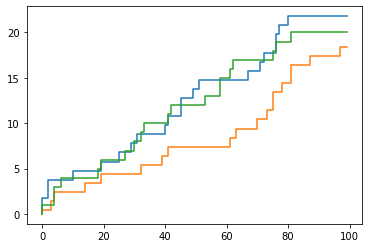

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

lamb = 0.2
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],3])

y[0,:] = stats.norm.rvs(size=3)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=3)

# plot(x,y[:,i])をそのまま実行すると、階段状のグラフが表現できないので、x_とy_を作成し、描画を行った。
x_ = np.repeat(x,2)
y_ = np.zeros([200,3])
for i in range(1,200):
    y_[i,:] = y[(i-1)//2,:]

for i in range(y.shape[1]):
    plt.plot(x_,y_[:,i])

plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

lamb = 0.2
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],3])

y[0,:] = stats.norm.rvs(size=3)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=3)

diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

lambda_estimate = np.mean(diff, axis=0)

print("Estimated lambda: {}".format(lambda_estimate))

Estimated lambda: [0.21764052 0.18400157 0.19978738]


In [16]:
np.random.seed(0)

lamb = 0.2
x = np.arange(0,10000,1)
y = np.zeros([x.shape[0],3])

y[0,:] = stats.norm.rvs(size=3)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=3)

diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

lambda_estimate = np.mean(diff, axis=0)

print("Estimated lambda: {}".format(lambda_estimate))

Estimated lambda: [0.20237641 0.19824002 0.20289787]
